# **CS210 - Introduction to Data Science**
## **Homework 2** **/Filiz İpek Oktay - 30780**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for the homework.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)




❗ **Download the data from SuCourse.** It's named **cs210_hw2_dataset.csv**.
You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .

You will use ChatGPT **3.5** to write your code. For each part, send a prompt to ChatGPT for the task. You can use the initial prompt OR use additional prompts to correct / guide GPT. Copy the code generated by GPT to this notebook and run it here.

❗ **You will share your chat history, so use the same chat for ALL your prompts.**

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS210-HW2.ipynb. (You can download by clicking on File - Download - Download .ipynb). Submit the ipynb to SuCourse.



## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [24]:
# code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [25]:
# code here
# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = "cs210_hw2_dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,NaN,female,fish,adult,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,NaN,fish,adult,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,NaN,adult,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021.0


## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [26]:
# code here

print("Shape of the dataset:", df.shape)

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['health_metrics'])  # Independent variables
y = df['health_metrics']  # Dependent variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the names of independent variables (features)
independent_variables = X.columns
print("Independent Variables (Features):", list(independent_variables))
print("\n")

# Display the name of the dependent variable (target)
print("Dependent Variable (Target):", y.name)
print("\n")

# Display the summary of the dataset
df.info()

# Display the first 5 rows from the training dataset
print("First 5 rows from training dataset:")
X_train.head()


Shape of the dataset: (3430, 11)
Independent Variables (Features): ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage', 'year']


Dependent Variable (Target): health_metrics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   float64
dtypes: float64(5), obje

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,year
1258,Adelie,Torgensen,30.9,13.7,199.0,4901.0,female,krill,adult,2023.0
932,Gentoo,Biscoe,24.8,17.5,205.0,5940.0,male,NaN,juvenile,2022.0
572,Adelie,Torgensen,62.5,14.5,206.0,4664.0,female,fish,juvenile,2022.0
736,Chinstrap,Dream,32.0,17.4,211.0,NaN,male,krill,juvenile,NaN
2288,Gentoo,Biscoe,56.7,17.7,235.0,5689.0,female,fish,juvenile,2024.0


In [27]:
import pandas as pd

# Assuming the provided DataFrame is named 'df'

# Mapping for 'species'
species_map = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}

# Mapping for other categorical variables
sex_map = {'female': 1, 'male': 0}
island_map = {'Biscoe': 1, 'Dream': 2, 'Torgensen': 3}
diet_map = {'fish': 1, 'krill': 2, 'squid': 3, "parental": 4}
life_stage_map = {'chick': 1, 'juvenile': 2, 'adult': 3}
health_metrics_map = {'healthy': 1, 'overweight': 2, 'underweight': 3}

# Check for missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

# Encode categorical labels using the provided mappings
df['sex'] = df['sex'].map(sex_map)
df['species'] = df['species'].map(species_map)  # Add this line for 'species'
df['island'] = df['island'].map(island_map)
df['diet'] = df['diet'].map(diet_map)
df['life_stage'] = df['life_stage'].map(life_stage_map)
df['health_metrics'] = df['health_metrics'].map(health_metrics_map)

# Choose a strategy to handle missing values for numeric columns
# Option 1: Drop rows with missing values
# df_cleaned = df.dropna()

# Option 2: Fill missing values with the mean for numeric columns
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

# Check for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

# Display the final encoded and cleaned DataFrame
print("\nEncoded and cleaned DataFrame:")
df


Missing values before handling:
species              248
island                42
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                  251
diet                 267
life_stage            69
health_metrics         0
year                  43
dtype: int64

Missing values after handling:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

Encoded and cleaned DataFrame:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,1.0,1.0,53.4,17.8,219.0,5687.0,1.0,1.0,2.0,2,2021.0
1,1.0,1.0,49.3,18.1,245.0,3581.0,1.0,1.0,3.0,2,2021.0
2,1.0,1.0,55.7,16.6,226.0,5388.0,1.0,1.0,3.0,2,2021.0
3,1.0,1.0,38.0,15.6,221.0,6262.0,1.0,2.0,3.0,2,2021.0
4,1.0,1.0,60.7,17.9,177.0,4811.0,1.0,1.0,2.0,2,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
3425,3.0,1.0,44.0,20.4,252.0,3581.0,0.0,2.0,3.0,1,2025.0
3426,3.0,1.0,54.5,25.2,245.0,6872.0,1.0,3.0,2.0,1,2025.0
3427,3.0,1.0,51.4,20.4,258.0,3581.0,0.0,3.0,3.0,2,2025.0
3428,3.0,1.0,55.9,20.5,247.0,3581.0,0.0,3.0,3.0,1,2025.0


## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [28]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# code here

# Shuffle the dataset
df_shuffled = shuffle(df, random_state=42)

# Separate dependent variable (y) and independent variables (X)
X = df_shuffled.drop(columns=['health_metrics'])
y = df_shuffled['health_metrics']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2744, 10)
X_test shape: (686, 10)
y_train shape: (2744,)
y_test shape: (686,)


## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


Correlations with 'health_metrics':
 health_metrics       1.000000
life_stage           0.129573
flipper_length_mm    0.091418
bill_depth_mm        0.056337
bill_length_mm       0.040724
body_mass_g          0.019261
year                -0.000750
species             -0.006497
island              -0.022867
sex                 -0.053031
diet                -0.172632
Name: health_metrics, dtype: float64


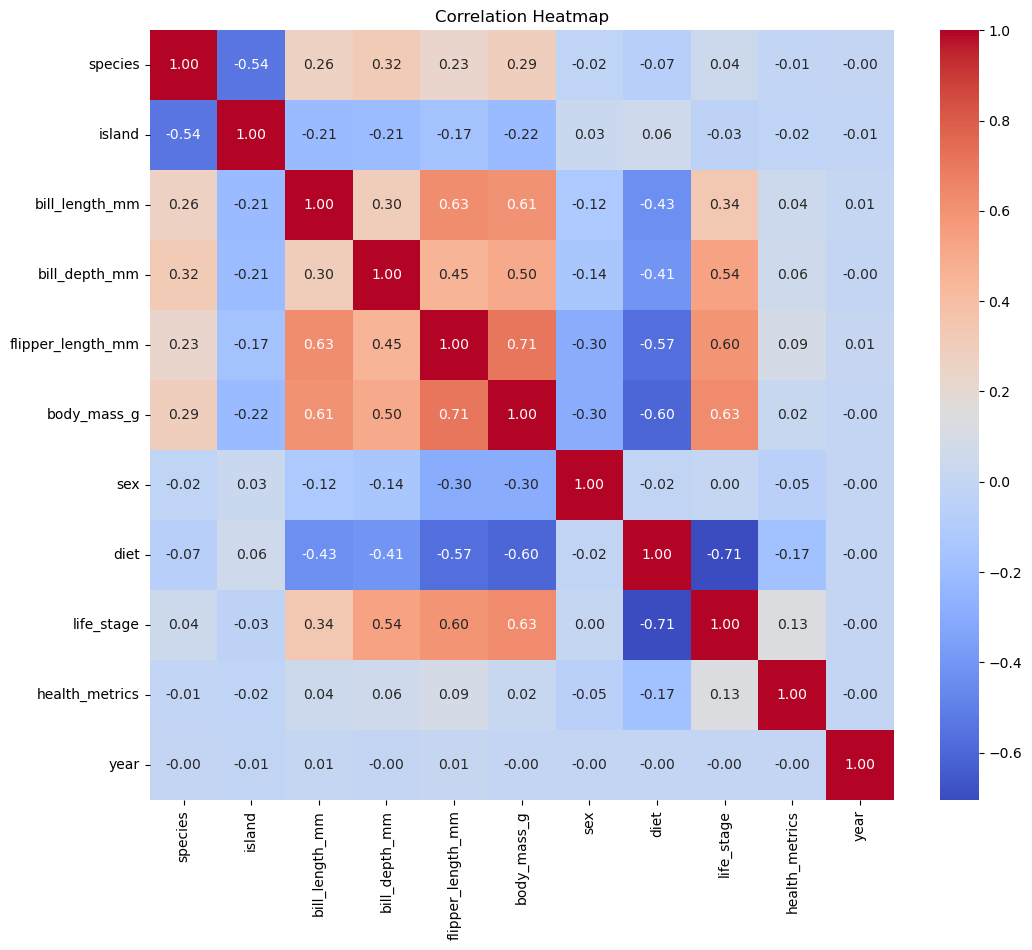

Selected Features:
Index(['life_stage', 'diet'], dtype='object')


In [29]:
# code here
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr()

# Get correlations with the target variable ('health_metrics')
target_correlations = correlation_matrix['health_metrics'].sort_values(ascending=False)

# Display correlations with the target variable
print("Correlations with 'health_metrics':\n", target_correlations)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Select features with absolute correlation greater than a threshold (e.g., 0.1)
threshold = 0.1
selected_features = target_correlations[abs(target_correlations) > threshold].index

# Drop 'health_metrics' from the selected features
selected_features = selected_features.drop('health_metrics', errors='ignore')


# Display selected features
print("Selected Features:")
print(selected_features)



**You can write your answers to (4.1) here.**
----
----

Correlations with 'health_metrics' for Hypothetical Features:
 daily_activity_level    0.075573
digestive_efficiency   -0.117883
health_metrics          1.000000
Name: health_metrics, dtype: float64


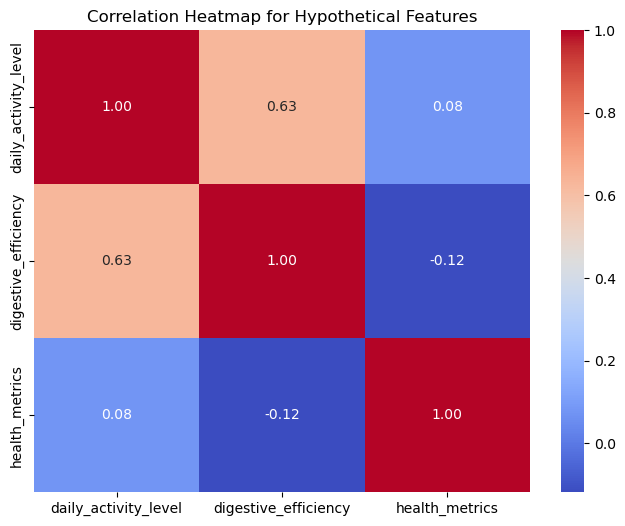

In [30]:
# code here

# 3rd bulletpoint

# Hypothetical Feature 1: Daily Activity Level
df['daily_activity_level'] = df['flipper_length_mm'] / df['body_mass_g']

# Hypothetical Feature 2: Digestive Efficiency
df['digestive_efficiency'] = df['diet'] / df['body_mass_g']

# Calculate correlations with the target variable
hypo_correlations = df[['daily_activity_level', 'digestive_efficiency', 'health_metrics']].corr()

# Display correlations with the target variable for hypothetical features
print("Correlations with 'health_metrics' for Hypothetical Features:\n", hypo_correlations['health_metrics'])

# Plot heatmap for hypothetical features
plt.figure(figsize=(8, 6))
sns.heatmap(hypo_correlations, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap for Hypothetical Features')
plt.show()


## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# code here

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],  # None means unlimited depth
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)




Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5}
Test Accuracy: 0.8338192419825073


**Add explanation here:**
The choice of hyperparameters, in this case, max_depth and min_samples_split, depends on their impact on the decision tree's structure and complexity. The goal is to strike a balance between capturing essential patterns in the data and preventing the model from becoming too complex. The chosen values for these hyperparameters will be determined through a grid search to optimize the model's performance.

## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [32]:
# code here

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing sets
# Split the data into training and testing sets (if not done already)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the full training set
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10}
Test Accuracy: 0.8454810495626822


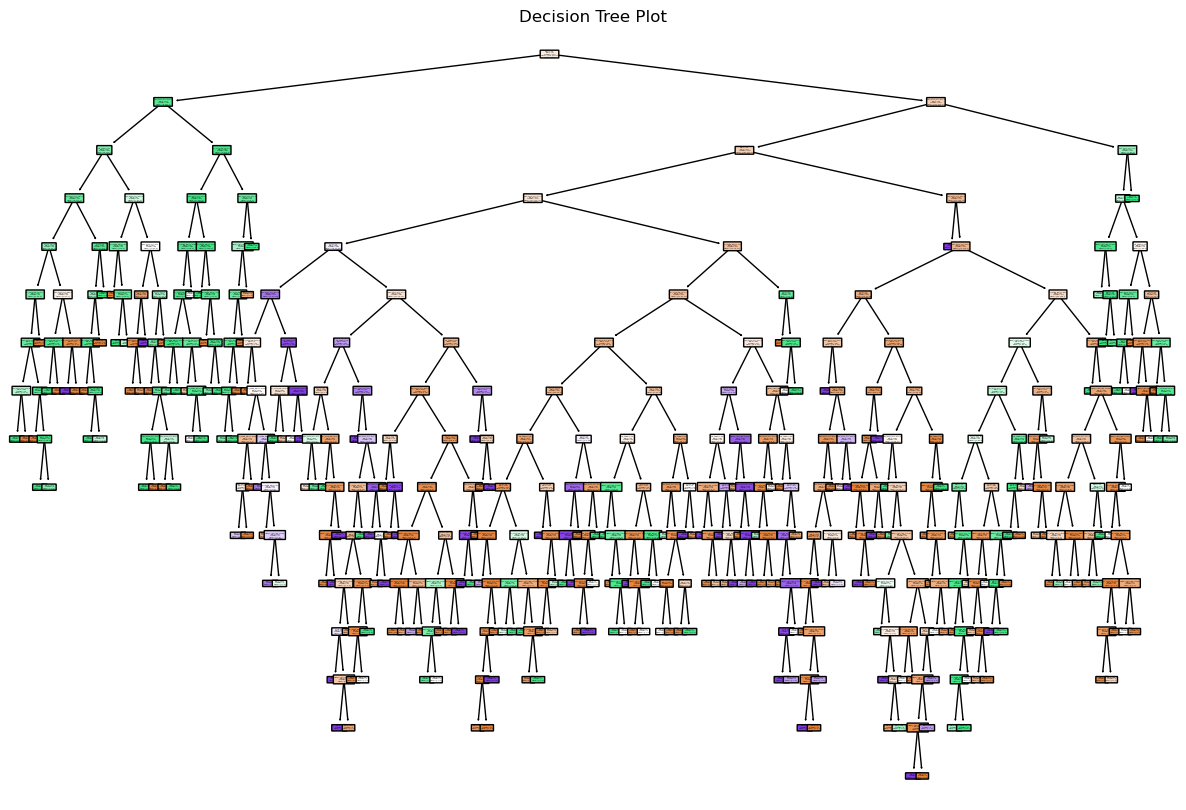

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming best_dt_classifier is your trained decision tree classifier
plt.figure(figsize=(15, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=list(X.columns), class_names=['healthy', 'overweight', 'underweight'], rounded=True)
plt.title('Decision Tree Plot')
plt.show()

## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [34]:
# code here

# Assuming best_dt_classifier is your trained decision tree classifier
y_pred = best_dt_classifier.predict(X_test)

# Calculate the classification accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Classification Accuracy:", accuracy)


Classification Accuracy: 0.8454810495626822


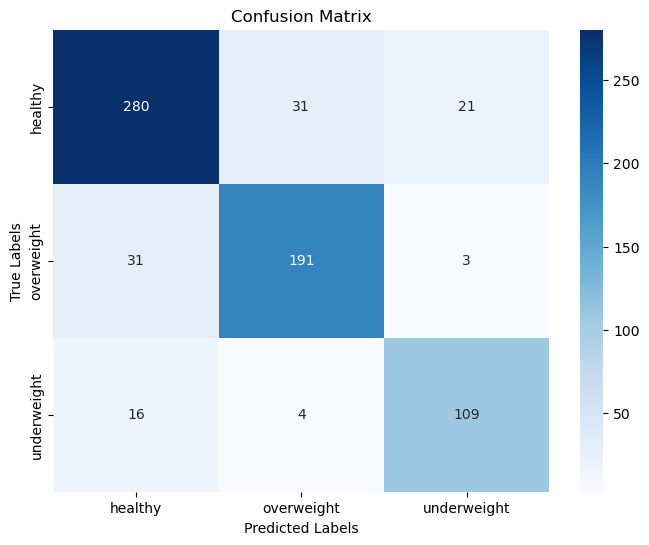

In [35]:
# code here
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the true labels for the test set
# and y_pred contains the predicted labels from your model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['healthy', 'overweight', 'underweight'], yticklabels=['healthy', 'overweight', 'underweight'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Fill the blanks:** The model most frequently mistakes class(es) healthy for class(es) overweight.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
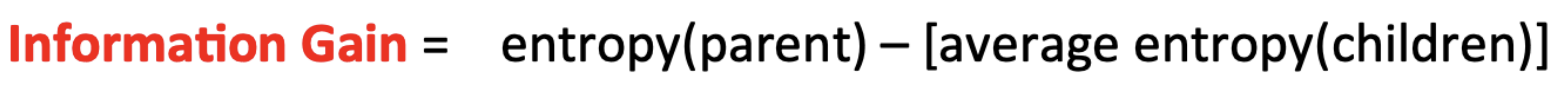



In [36]:
import warnings
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Assuming df is your DataFrame with the loaded data
# Replace "health_metrics" with your actual target column name

# Extract features (X) and target variable (y)
X = df.drop("health_metrics", axis=1)
y = df["health_metrics"]

# Initialize a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Fit the classifier to the data
dt_classifier.fit(X, y)

# Calculate the entropy of the parent node
parent_counts = dt_classifier.tree_.value[0]
parent_entropy = -np.sum((parent_counts / np.sum(parent_counts)) * np.log2(parent_counts / np.sum(parent_counts)))

# Calculate the entropy of each child node after the split
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Suppress warnings
    children_entropy = [
        -np.sum((dt_classifier.tree_.value[i] / np.sum(dt_classifier.tree_.value[i])) * \
        np.log2(dt_classifier.tree_.value[i] / np.sum(dt_classifier.tree_.value[i]))) if np.sum(dt_classifier.tree_.value[i]) > 0 else 0
        for i in range(1, dt_classifier.tree_.node_count)
    ]

# Calculate information gain, replacing nan with 0 if necessary
information_gain = parent_entropy - np.nanmean(children_entropy)

print("Information Gain on the first split with Entropy:", information_gain)

Information Gain on the first split with Entropy: 0.37680075203476404



## 9) GPT 3.5 Chat History

Submit the link for your chat history.



*   When you are in the chat, click on the "Share Chat" button on the top right (Shown Below).

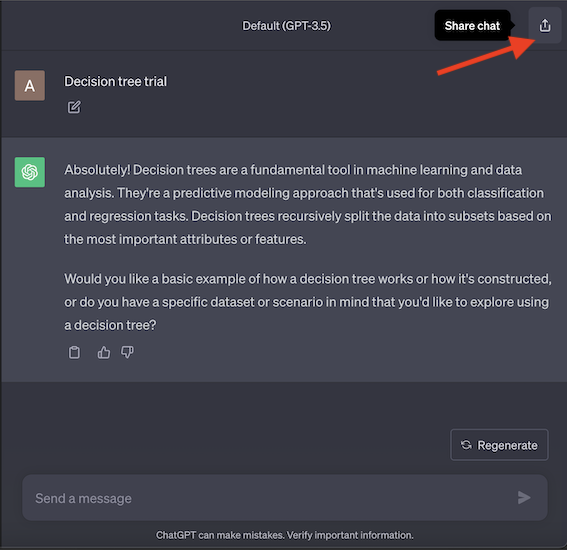

- On the screen that opens up, name the chat Name-Surname-CS412-HW1 (Shown Below).

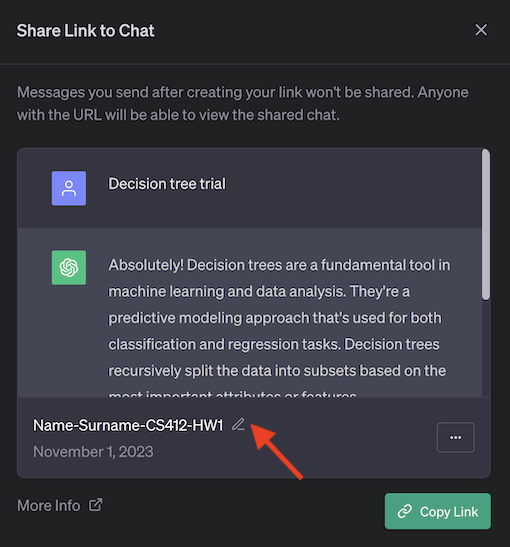

- Set sharing to "Share your name" (Shown Below).

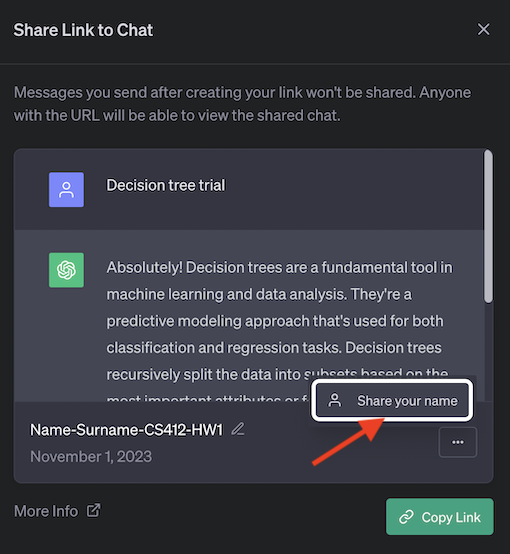

- Copy link and paste to the text cell below (Shown Below).

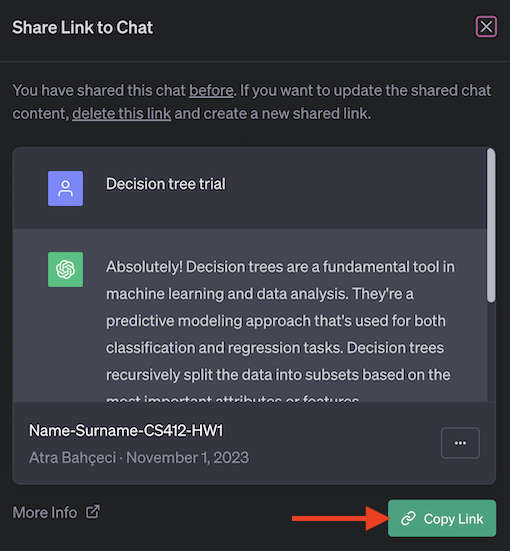

**Link to Chat:** https://chat.openai.com/share/34d6ce08-90be-40ed-af5b-6a99af8d4ac1